# TASK 4

### Importing packages

In [ ]:
!pip install -U textblob

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

### Adding heading to the dataset and seeing the data

In [3]:
name=['ID','Brand','Sentiment','Sentence']
data=pd.read_csv('C:\\Users\\LENOVO\\Downloads\\twitter_training.csv.zip',names=name)

In [4]:
data

,ID,Brand,Sentiment,Sentence
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Brand      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Sentence   73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
data.describe()

,ID
count,71982.000000
mean,6437.396307
std,3743.198550
min,1.000000
25%,3199.000000
50%,6434.000000
75%,9607.000000
max,13200.000000


In [14]:
data.drop_duplicates(inplace=True)

## Histogram showing the distribution of sentiment 

Text(0, 0.5, 'Frequency')

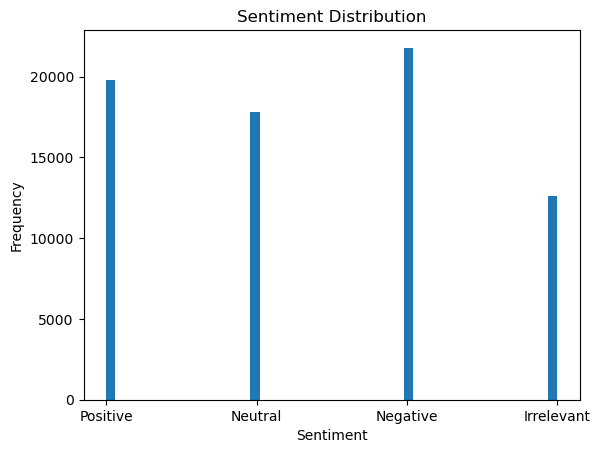

In [15]:
plt.hist(data['Sentiment'], bins=50)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

In [16]:
data['Sentiment'].value_counts()

Negative      21787
Positive      19811
Neutral       17800
Irrelevant    12584
Name: Sentiment, dtype: int64

## Visualize the sentiment breakdown for each brand with pie charts

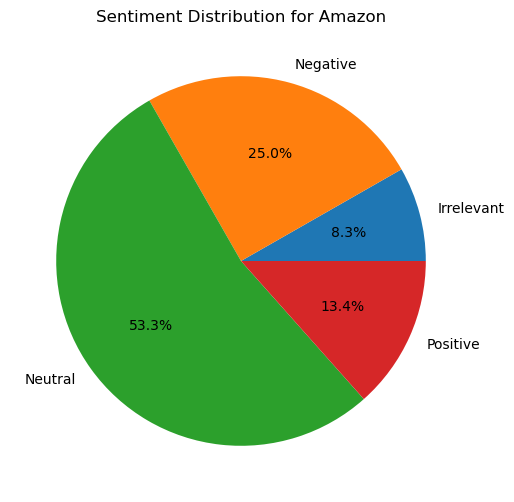

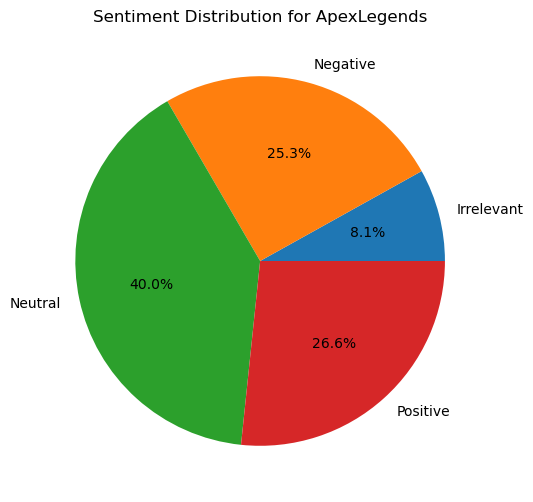

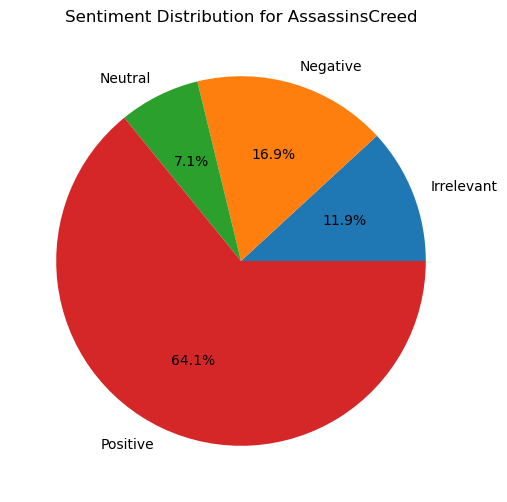

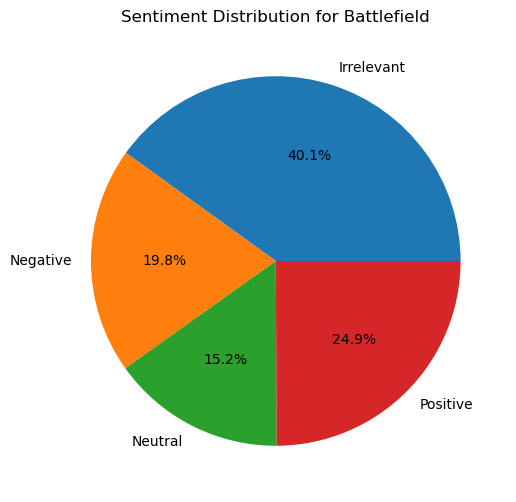

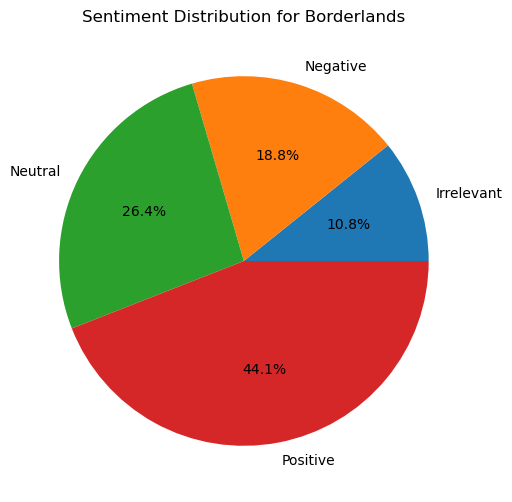

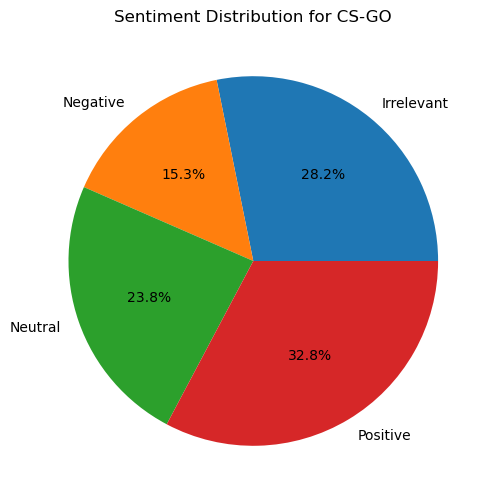

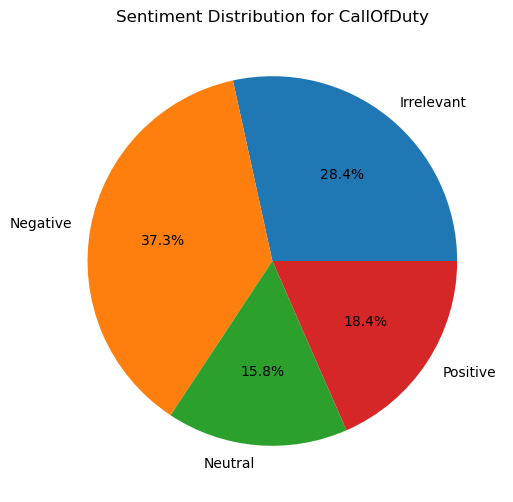

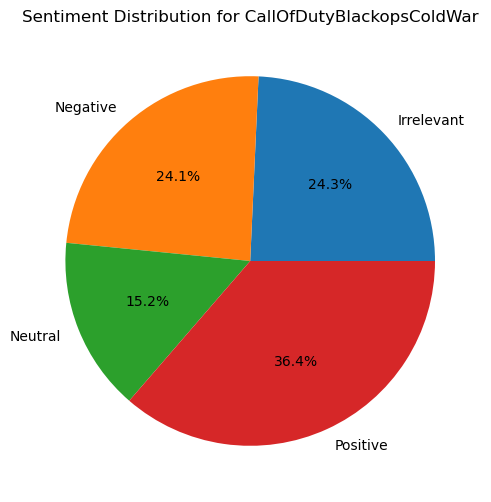

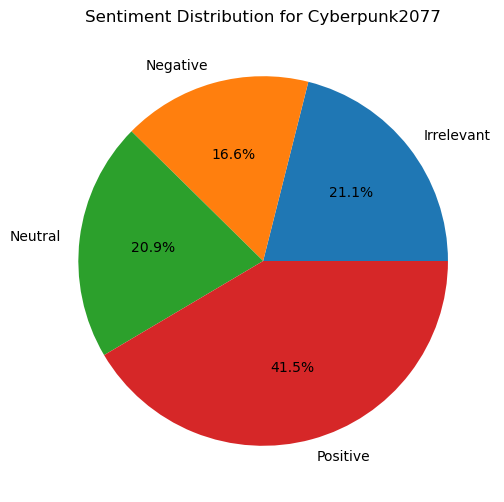

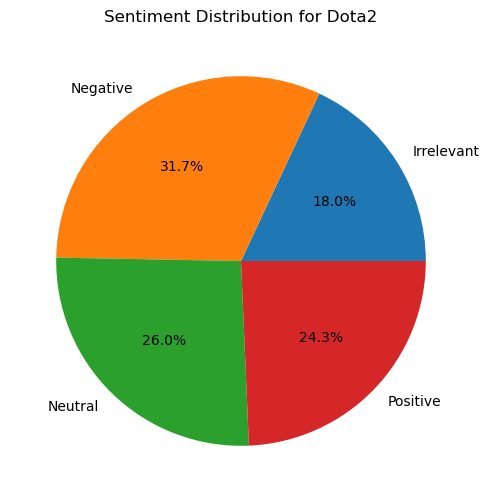

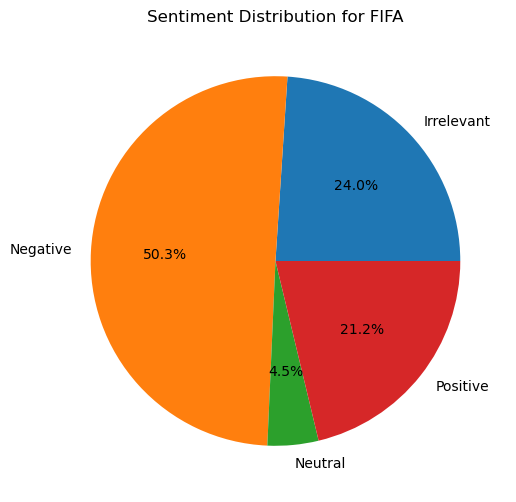

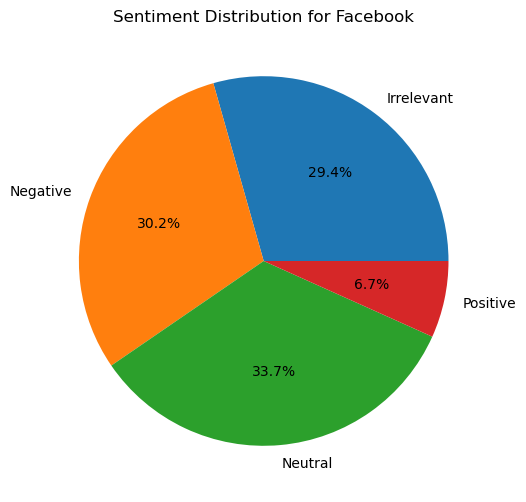

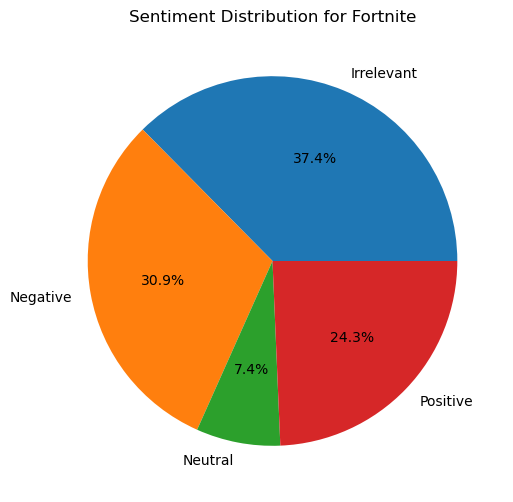

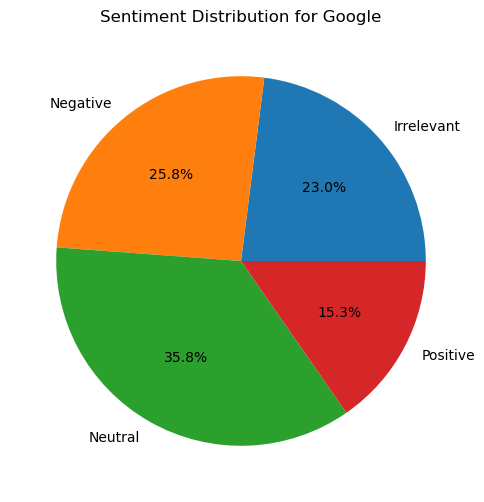

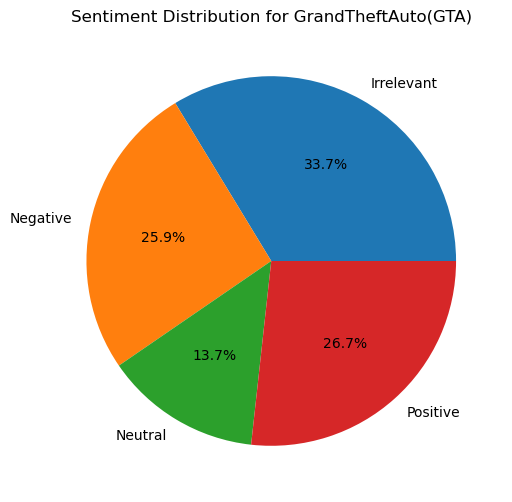

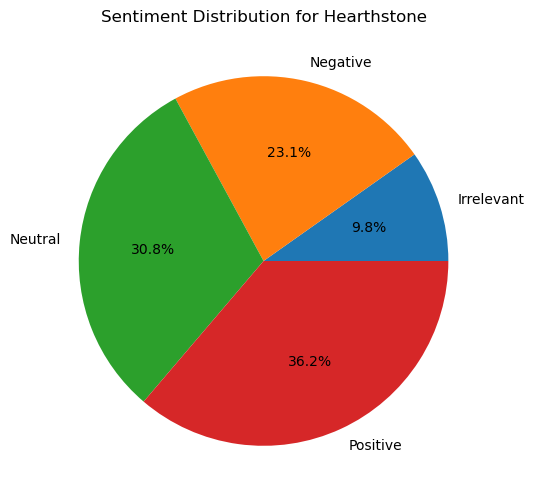

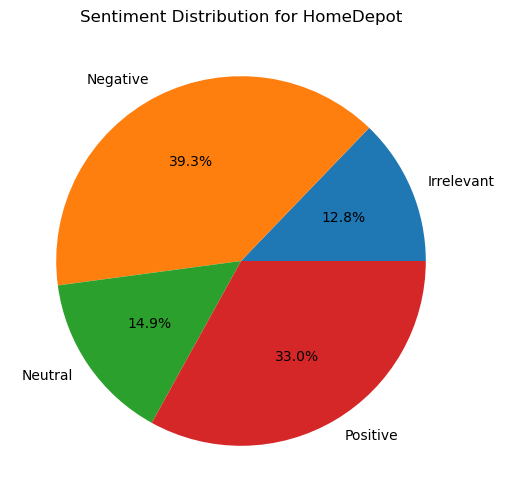

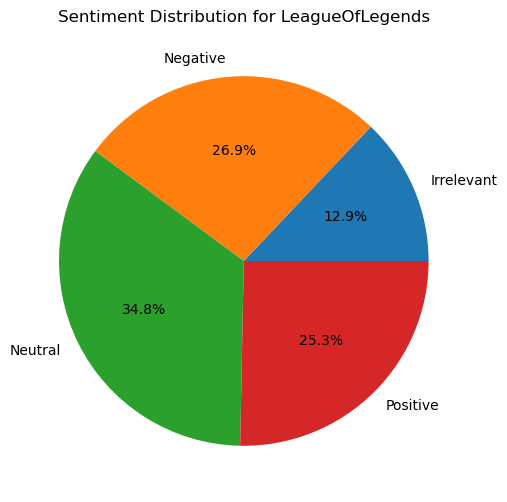

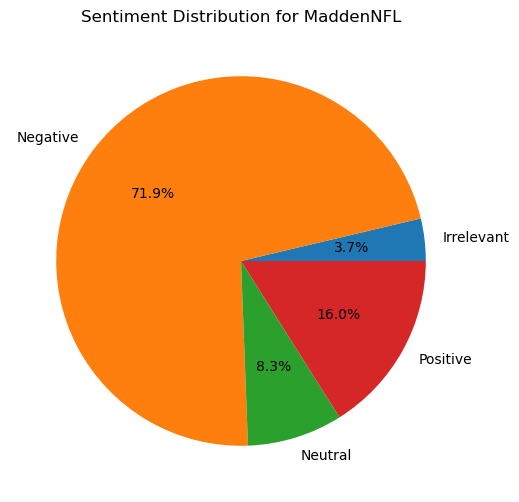

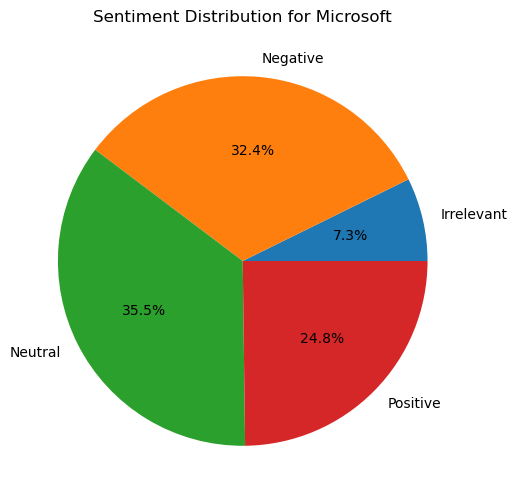

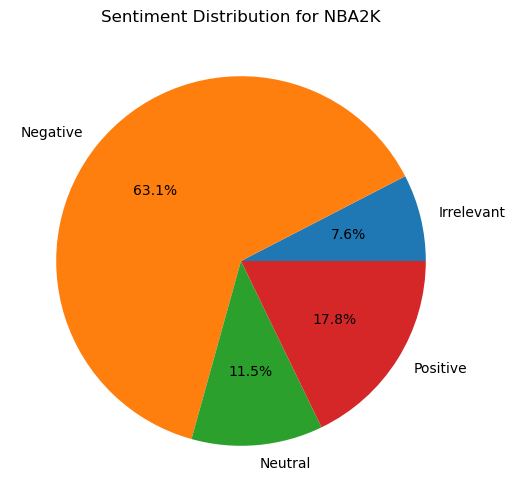

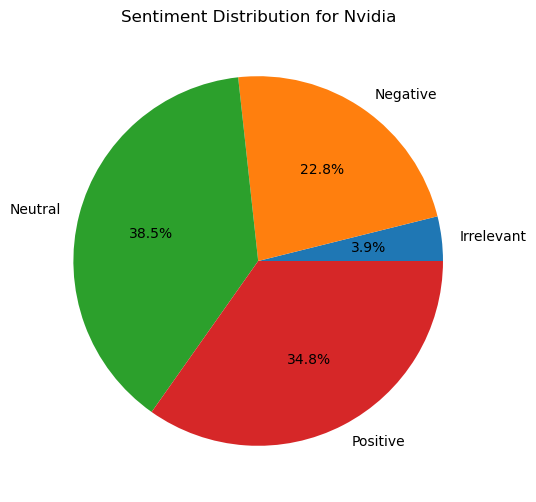

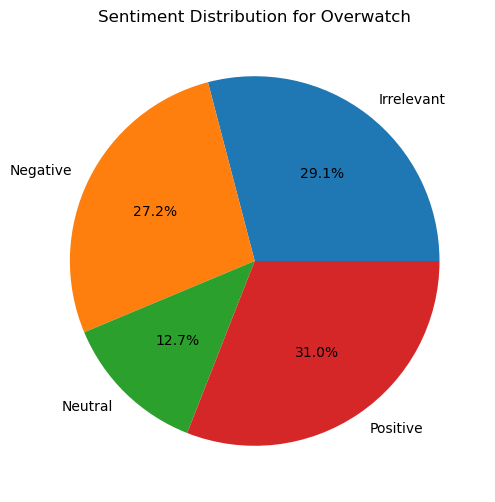

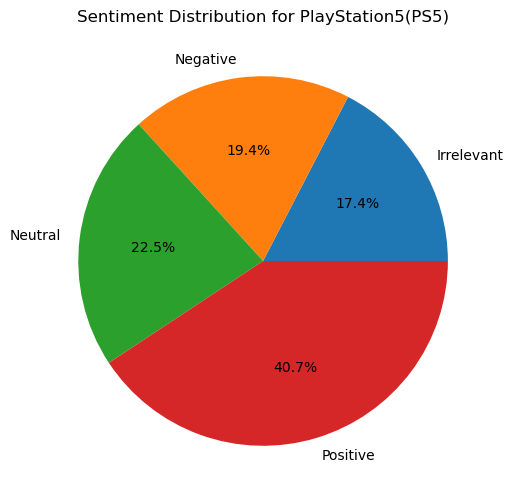

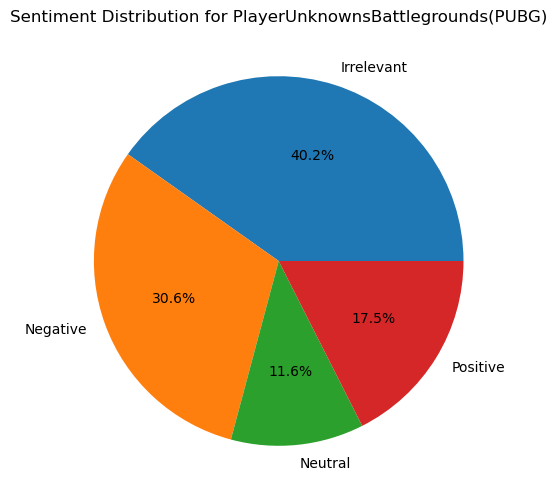

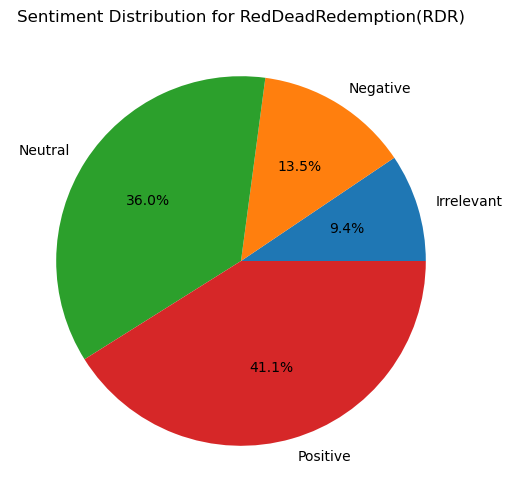

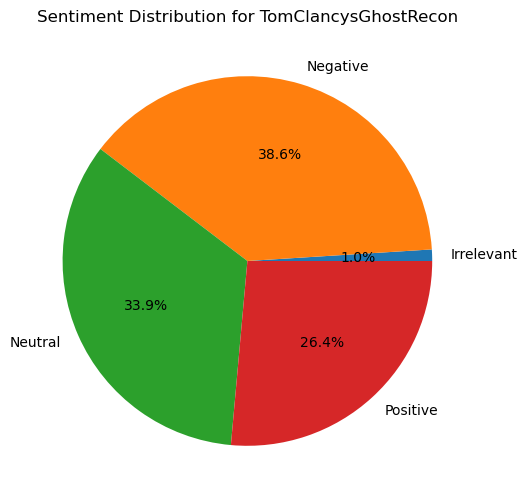

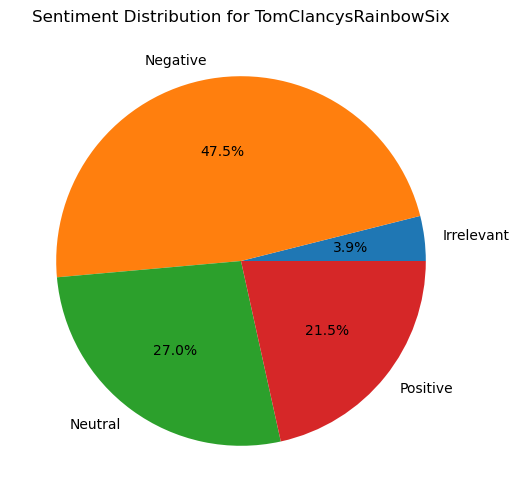

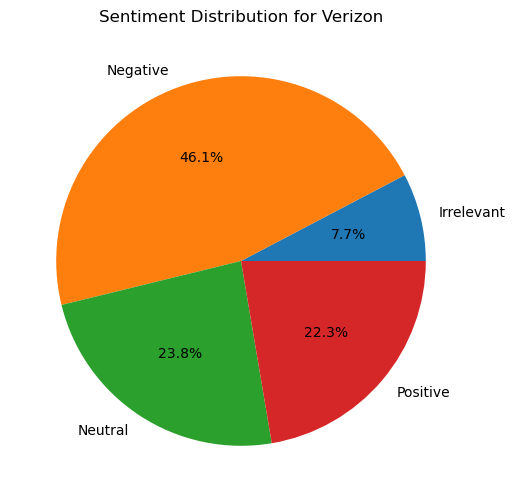

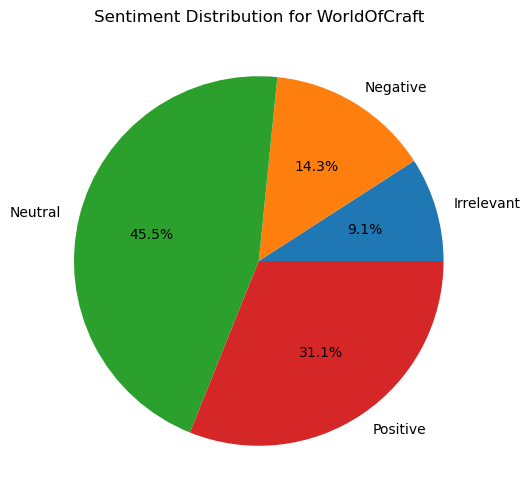

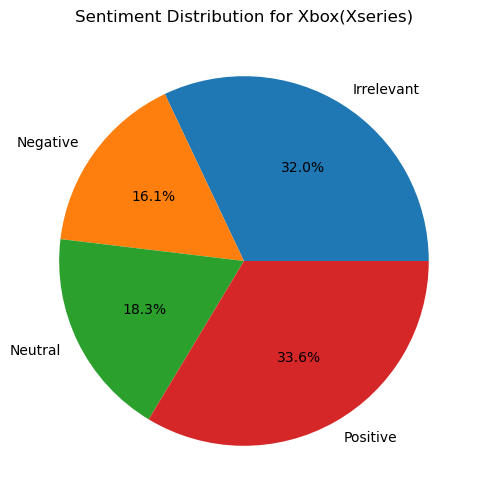

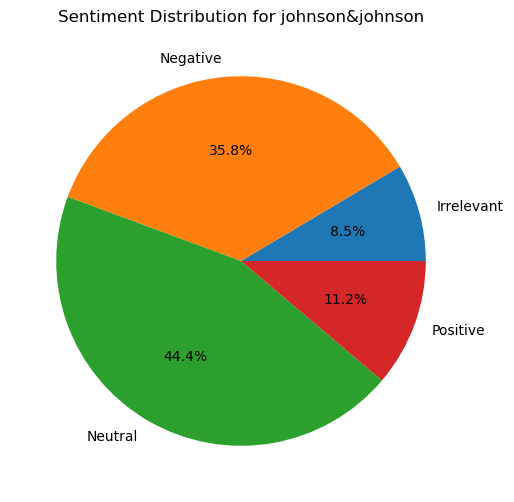

In [22]:
Brand_sentiment_counts = data.groupby(['Brand', 'Sentiment']).size().reset_index(name='count')
for Brand in Brand_sentiment_counts['Brand'].unique():
    Brand_data = Brand_sentiment_counts[Brand_sentiment_counts['Brand'] == Brand]
    plt.figure(figsize=(8, 6))
    plt.pie(Brand_data['count'], labels=Brand_data['Sentiment'], autopct='%1.1f%%')
    plt.title(f'Sentiment Distribution for {Brand}')
    plt.show()

## Heatmap displaying the top Brands ranked by sentiment

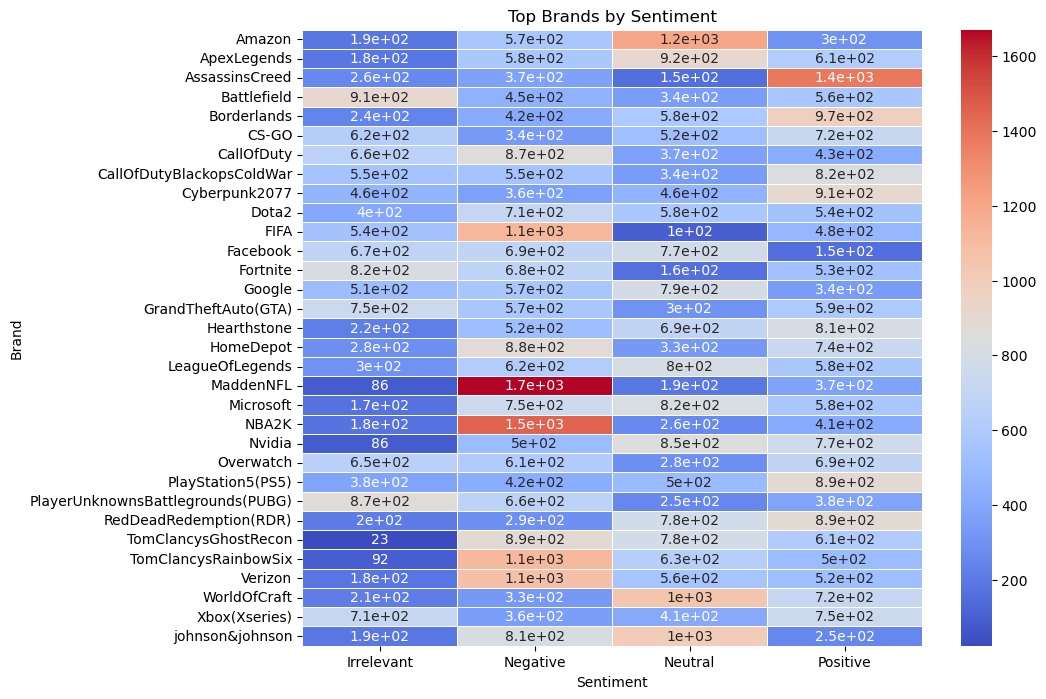

In [20]:
top_Brand = data.groupby('Brand')['Sentiment'].value_counts().unstack().fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(top_Brand, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Top Brands by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Brand')
plt.show()